In [ ]:
!gdown --id 17n3UV16quhH4PLMAn_SlIDyYGcTsQhiG

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
data = pd.read_csv('diabetes.csv')
data.head(10)

In [ ]:
data_x = data.iloc[:,:-1].values
data_y = data.iloc[:,-1].values
print(data_x.shape)
print(data_y.shape)
print(data_x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=123, shuffle=True)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [ ]:
x_train.std(0)
x_train_s.std(0)

In [ ]:
def convert_to_int(y):
  y_int =[]
  for item in y:
    if item == 'positive':
      y_int.append(1)
    else:
      y_int.append(0)
  return y_int
  

In [ ]:
y_train_int = convert_to_int(y_train)
y_test_int = convert_to_int(y_test)


In [ ]:
x_train_s.shape
# y_train.shape

In [ ]:
class myDataset(Dataset):
  def __init__(self, X, y):
    super(myDataset,self).__init__()
    self.X = torch.tensor(X, dtype=torch.float)
    self.y = torch.tensor(y, dtype=torch.float).unsqueeze(1)
  def __getitem__(self, index):
    return self.X[index], self.y[index]
  def __len__(self):
    return self.X.shape[0]
    #return len(self.X)


In [ ]:
train_dataset = myDataset(x_train_s, y_train_int)
test_dataset = myDataset(x_test_s, y_test_int)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

for (inputs, labels) in train_loader:
  print(inputs.shape)
  print(labels.shape)
  print(type(inputs))
  print(type(labels))
  break




In [ ]:
len(test_loader)

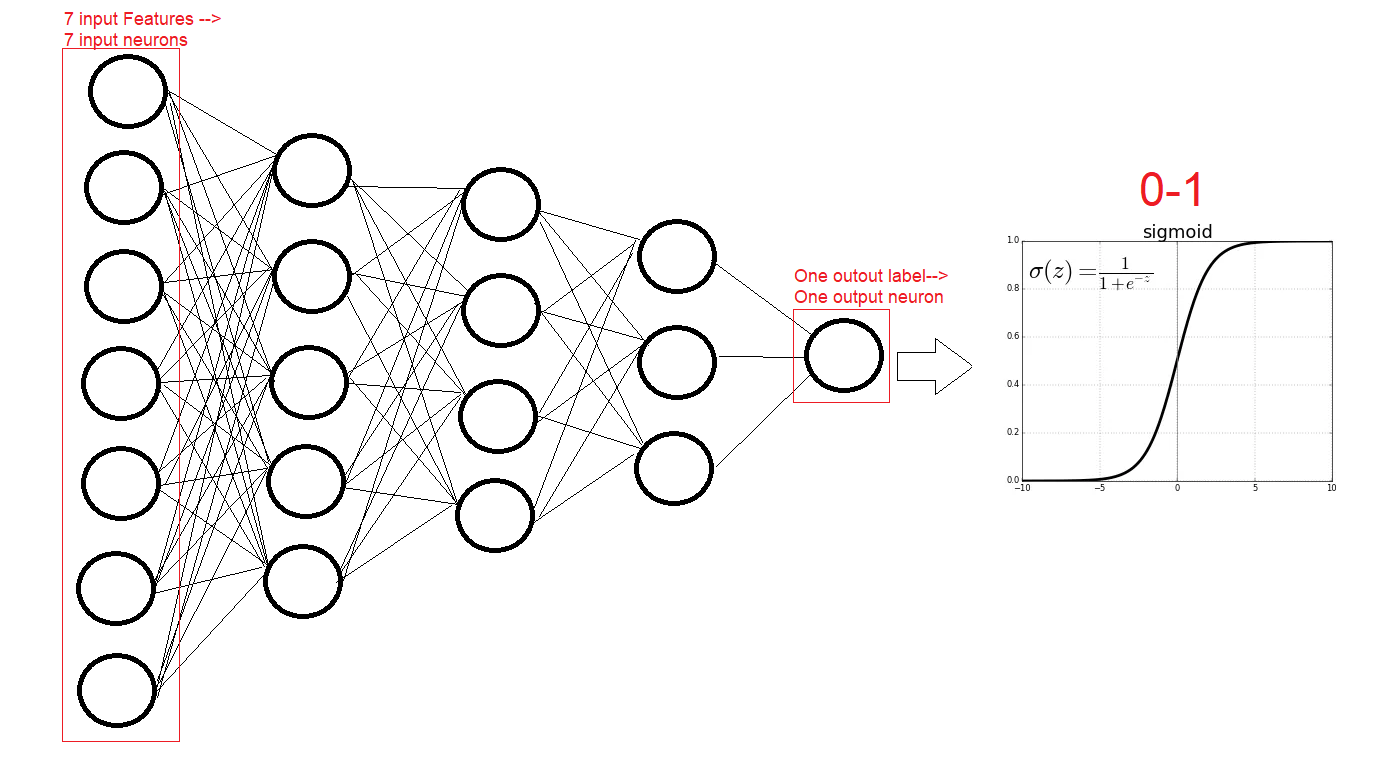

In [ ]:
input_size = 7
hidden_size1 = 5
hidden_size2 = 4
hidden_size3 = 3
hidden_size4=3
output_size = 1

In [ ]:
class myNetwork(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    super(myNetwork, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.fc2 = nn.Linear(hidden_size1, hidden_size2)
    self.fc3 = nn.Linear(hidden_size2, hidden_size3)
    self.fc4 = nn.Linear(hidden_size3, hidden_size4)
    self.output = nn.Linear(hidden_size4, output_size)
    self.activation = nn.ReLU()
    self.SIGMOID = nn.Sigmoid()
  def forward(self, x):
    out = self.fc1(x)
    out =self.activation(out)
    # out = self.activation(self.fc1(x))
    out = self.fc2(out)
    out = self.activation(out)
    out = self.fc3(out)
    out =  self.activation(out)
    out=self.fc4(out)
    out =  self.activation(out)
    out = self.output(out)
    out = self.SIGMOID(out)
    return out



In [ ]:
network = myNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001)
criterion = nn.BCELoss()

In [ ]:
def train_network(model, train_loader, optimizer, criterion, num_epochs, train_dataset, test_loader, test_dataset):
  epoch_loss =[]
  epoch_accuracy = []
  test_loss =[]
  test_accuracy =[]
  for epoch in range(num_epochs):
    model.train()
    running_loss =0.0
    num_corrects =0.0
    for (x, labels) in train_loader:
      outputs = model(x)
      loss = criterion(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      num_corrects += ((outputs>=0.5).float() == labels).float().sum()
    avg_loss = running_loss / len(train_loader)
    avg_acc = num_corrects / len(train_dataset)
    epoch_loss.append(avg_loss)
    epoch_accuracy.append(avg_acc)
    test_avgloss, test_avgacc = test(model, test_loader, criterion, test_dataset)
    test_loss.append(test_avgloss)
    test_accuracy.append(test_avgacc)
    print('Epoch{}/{}, train loss={:.3f}, train acc ={:.3f}, test loss = {:.3f}, test acc = {:.3f}'.format(epoch+1,num_epochs,
                                                                                                    avg_loss, avg_acc, test_avgloss,
                                                                                                  test_avgacc  ))
  return epoch_accuracy, epoch_loss, test_loss, test_accuracy
                                  

In [ ]:
a=torch.tensor([1,2,3,4,0,2,3,5])
a>=2
(a>=2).float()

In [ ]:
def test(model, test_laoder, criterion, test_dataset):
  model.eval()
  test_loss = 0.0
  num_corrects =0.0
  for (x, labels) in test_loader:
    outputs = model(x)
    loss = criterion(outputs, labels)
    test_loss += loss.item()
    num_corrects += ((outputs>=0.5).float() == labels).float().sum()
  avg_loss = test_loss / len(test_loader)
  avg_accuracy = num_corrects / len(test_dataset)
  return(avg_loss, avg_accuracy)


In [ ]:
num_epochs = 130
train_acc, train_loss, test_loss, test_acc=train_network(network, train_loader, optimizer, criterion, num_epochs, train_dataset,
              test_loader, test_dataset)

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(5,5))
plt.plot(train_loss, label='training loss')
plt.plot(test_loss, label = 'test loss')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(5,5))
plt.plot(train_acc, label='training acc')
plt.plot(test_acc, label = 'test acc')
plt.legend()
plt.show()